# webscraping from Gaurdian platform about debate and politics 

In [47]:
import pandas as pd
import requests

In [48]:
api= 'f9842300-004b-44c2-b7e7-fce934b2a9b4'

In [51]:
urlsample=["https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4"
          ]

In [115]:
### inorder to give a good look, first need to create a blank list and append with x
urllist=[]


In [105]:
####suppose we need to add many pages, then we use loop


In [116]:
for i in range(1,15):
    a="https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page="
    b=str(i)
    c=a+b
    urllist.append(c)

In [117]:
urllist

['https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=1',
 'https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=2',
 'https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=3',
 'https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=4',
 'https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=5',
 'https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2022-01-01&api-key=f9842300-004b-44c2-b7e7-fce934b2a9b4&page=6',
 'https://conten

In [1]:
blanklist=[]

In [119]:
#Now use this to create a data base for all urllist

def new(url):
    new1=requests.get(url)
    y=new1.json()
    blanklist.append(y)

In [120]:
output=[new(url) for url in urllist]

In [ ]:
blanklist

In [122]:
####page size says how many response variables are there 
sectionId=blanklist[10]['response']['results'][9]['sectionId']
sectionId

'politics'

In [123]:
###now creating another blanklist
finallist=[]

In [124]:
####create a database for ID, date and title
try:
    for i in range(0,10):
        for j in range(0,5):
            value=dict(ID=blanklist[i]['response']['results'][j]['sectionId'],
                  section_name=blanklist[i]['response']['results'][j]['sectionName'],     
                  date=blanklist[i]['response']['results'][j]['webPublicationDate'],
                  Title=blanklist[i]['response']['results'][j]['webTitle'])
                  
            finallist.append(value)
except IndexError:
    print('done')           

In [ ]:
finallist

In [126]:
data=pd.DataFrame(finallist)

In [127]:
data

,ID,section_name,date,Title
0,politics,Politics,2022-07-25T20:57:13Z,First Truss-Sunak Tory leadership debate: five...
1,commentisfree,Opinion,2022-11-04T18:30:28Z,The Guardian view on Brexit and the economy: t...
2,politics,Politics,2022-07-17T19:57:27Z,Tory leadership race: five key takeaways from ...
3,politics,Politics,2022-07-26T07:54:31Z,Rishi Sunak ‘aggressive’ in Tory leadership de...
4,politics,Politics,2022-07-15T22:36:14Z,"Tory leadership debate: rivals discuss tax, en..."
5,politics,Politics,2022-08-01T05:00:15Z,Righter than right: Tories’ hardline drift may...
6,politics,Politics,2022-07-18T15:42:10Z,Cancelled TV debate underlines who Sunak and T...
7,uk-news,UK news,2022-07-26T02:02:17Z,‘Gloves are off’: what the papers say about th...
8,politics,Politics,2022-07-15T20:58:02Z,The Tory leadership debate: desperate as a sal...
9,politics,Politics,2022-07-17T19:50:33Z,How well did the Tory leadership candidates do...


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            50 non-null     object
 1   section_name  50 non-null     object
 2   date          50 non-null     object
 3   Title         50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [129]:
data['date']=data['date'].apply(pd.to_datetime)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            50 non-null     object             
 1   section_name  50 non-null     object             
 2   date          50 non-null     datetime64[ns, UTC]
 3   Title         50 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 1.7+ KB


In [131]:
######shows the date column only
data['only_date']=data['date'].dt.date

In [132]:
df=data.groupby('only_date')['Title'].count()
df=df.to_frame(name='count of articles')
df

,count of articles
only_date,
2022-06-23,1
2022-07-04,1
2022-07-09,1
2022-07-15,3
2022-07-17,3
2022-07-18,4
2022-07-20,2
2022-07-22,1
2022-07-25,1


In [133]:
import seaborn as sb
from matplotlib import pyplot as plt

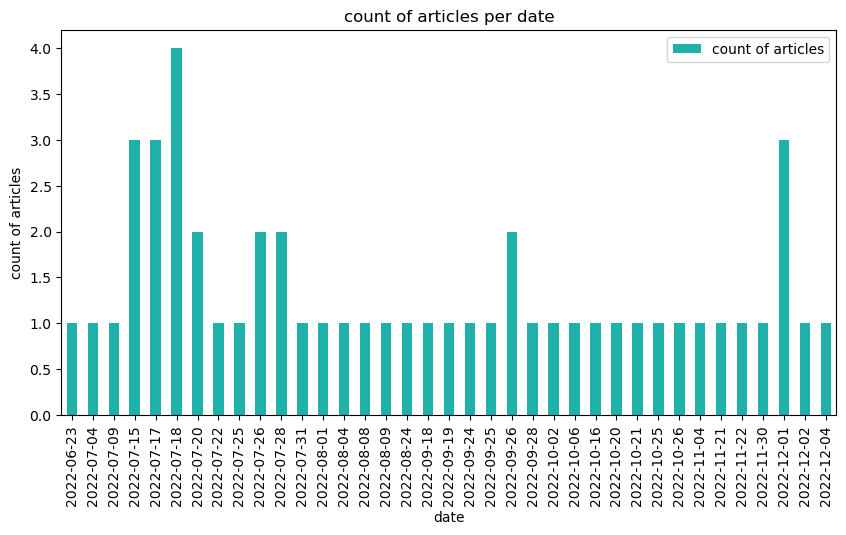

In [134]:
plt.figure(figsize=(10,5))
df['count of articles'].plot(kind='bar',color='lightseagreen')
plt.xlabel('date')
plt.ylabel('count of articles')
plt.title('count of articles per date')
plt.legend()

In [135]:
##### use if function in python
import numpy as np
df['new column']=np.where(df['count of articles']>1,'many articles','one article')

In [136]:
from collections import Counter

In [137]:
####count how many words are there in the title
m=Counter(" ".join(data['Title']).split()).most_common(20)
m

[('the', 22),
 ('Tory', 17),
 ('and', 17),
 ('|', 17),
 ('to', 14),
 ('of', 13),
 ('The', 12),
 ('leadership', 11),
 ('on', 11),
 ('a', 11),
 ('Sunak', 10),
 ('as', 9),
 ('in', 8),
 ('Truss', 8),
 ('for', 7),
 ('Labour', 7),
 ('view', 6),
 ('Rishi', 6),
 ('Guardian', 5),
 ('Editorial', 5)]

Tory, Rishi, Sunak, Leadeship words are most frequent